In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("heart.csv")





In [2]:
X = df.drop('target', axis =1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [3]:
y = df.target
y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators' : [i for i in range(1,15)],
            'max_depth':[i for i in range(1,15)],
             'criterion': ['gini', 'entropy']
            }

In [6]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=50)


In [7]:
grid_search_cv = GridSearchCV(clf_rf,param_grid=parametrs, cv=5)
grid_search_cv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14]})

In [8]:
grid_search_cv.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=9)

In [9]:
best_rf  = RandomForestClassifier(10,max_depth=5)
best_rf.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision_score(y_test,best_rf.predict(X_test))

0.9259259259259259

In [11]:
recall_score(y_test,best_rf.predict(X_test))

0.9615384615384616

In [12]:
precision_recall_curve(y_test,best_rf.predict(X_test))

(array([0.57142857, 0.92592593, 1.        ]),
 array([1.        , 0.96153846, 0.        ]),
 array([0, 1], dtype=int64))

In [13]:


df_feach = pd.DataFrame({"feature":list(X_train),
                  'feature_importances':best_rf.feature_importances_})

df_feach = df_feach.sort_values(by = 'feature_importances', ascending=False)
df_feach

,feature,feature_importances
2,cp,0.242904
12,thal,0.140698
11,ca,0.108930
7,thalach,0.100644
9,oldpeak,0.089301
10,slope,0.071741
0,age,0.057680
3,trestbps,0.051758
1,sex,0.049196
4,chol,0.046714


<AxesSubplot:xlabel='feature_importances', ylabel='feature'>

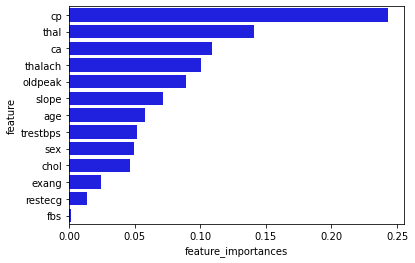

In [14]:
import seaborn as sns
np.random.seed(42)

sns.barplot(y = 'feature', x = 'feature_importances', data= df_feach,color='b', label = 'importances')


In [16]:
best_rf.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.